In [1]:
import os
import pandas
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [12]:
type = {
        }

In [2]:
nametype = []
imgnum = []
with open('data/txt/totalFileTrain.txt', 'r') as f:
    for line in f :
        print(line.split()[0])
        type[line.split()[0]] = int(line.split()[1])
        nametype.append(line.split()[0])
        imgnum.append(int(line.split()[1])) 

2D-Display-Pad


TypeError: 'type' object does not support item assignment

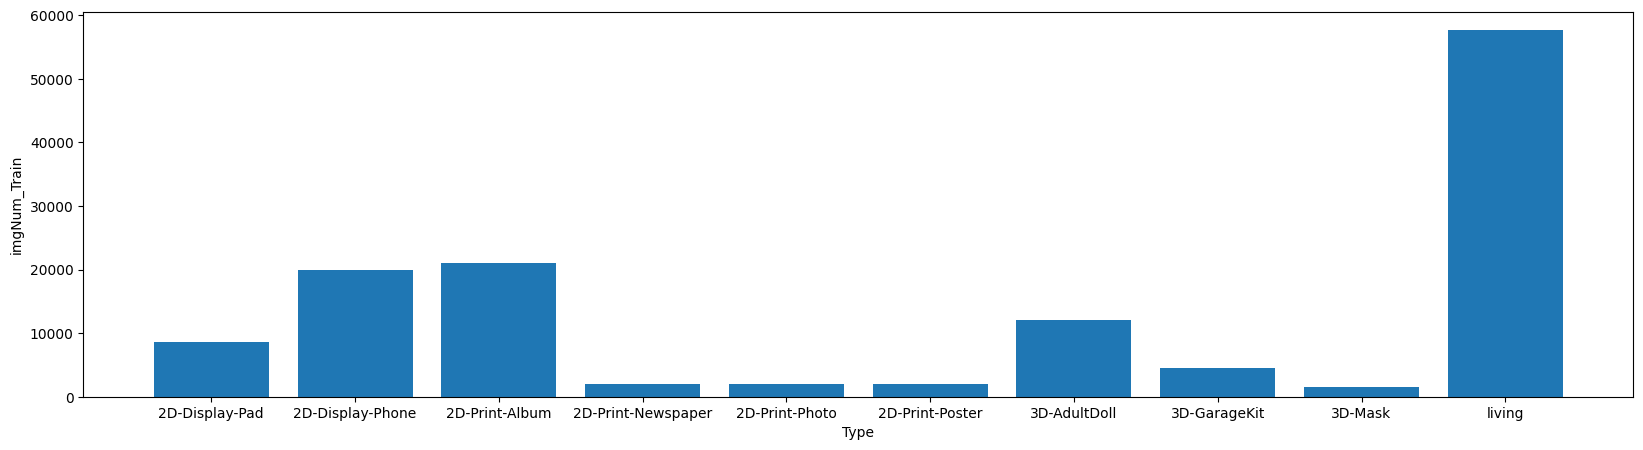

In [54]:
fig = plt.figure(figsize=(20, 5))
plt.bar(nametype,imgnum)
plt.xlabel('Type' )
plt.ylabel('imgNum_Train')
plt.show()

In [71]:
def thongke_label():
    living = 0
    spoof = 0
    with open('data/txt/namefileTrain.txt', 'r') as f:
        for line in f :
            if 'living' in line :
                living +=1  
            else : spoof += 1
    fig = plt.figure(figsize=(2, 5))
    
    plt.bar(x = ['living','spoof'],height= [living/1000, spoof/1000])
    plt.xlabel('Type' )
    plt.ylabel('imgNum_Train*1000')
    plt.show()


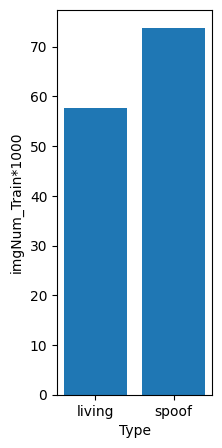

In [72]:
thongke_label()

In [31]:
def thongke_path_image():
    path_train = []
    with open('data/txt/pathImageTrain.txt', 'r') as f:
        for line in f :
            # print(line.split()[0].split('-'))
            path_train.append(line.split()[0])
            
    return path_train

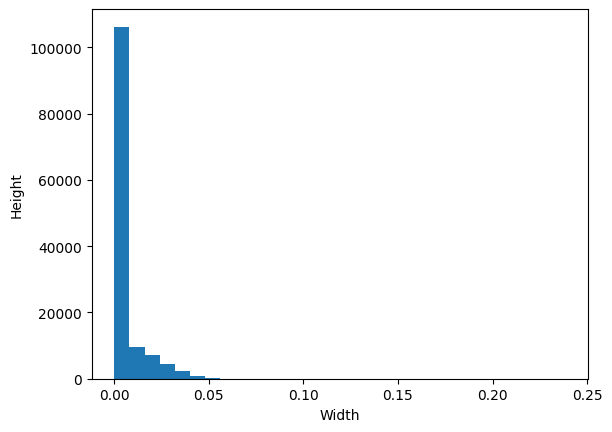

In [47]:
def thongke_Widt_Height() :
    df = pd.read_csv('data/csv/sizeTrain.csv')
    sizes_image = df['sizes_image']
    sizes_face = df['sizes_face']
    rate = []
    for i in range(len(df)) :
        size_imgH = int(sizes_image[i].split(',')[0][1:])
        size_imgW = int(sizes_image[i].split(',')[1][1:-1])
        size_faceH = int(sizes_face[i].split(',')[0][1:])
        size_faceW = int(sizes_face[i].split(',')[1][1:-1])
        rate.append(size_faceH * size_faceW/10000000)
    plt.hist(rate, bins=30)
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.show()
thongke_Widt_Height()

In [20]:
thongke_Widt_Height()


['(1050, 1662)']


ValueError: invalid literal for int() with base 10: '('

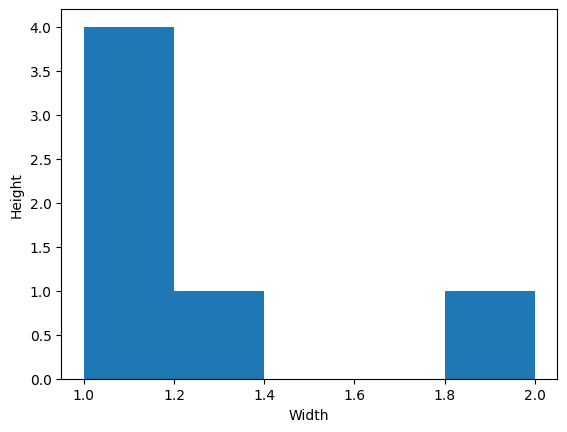

In [6]:
plt.hist([1.1,1.2,1,1.1,2,1.1], bins=5)
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

In [14]:
df = pd.read_csv('data/csv/all_image.csv')
path_image_not_train = []
for pt in df['path_all_image'] :
    if pt not in path_image :
        path_image_not_train.append(pt)


/mnt/sda1/datasets/FAS-CVPR2023/train/CVPR2023-Anti_Spoof-Challenge-Release-Data-20230209/Train/living/020735/000001.jpg
/mnt/sda1/datasets/FAS-CVPR2023/train/CVPR2023-Anti_Spoof-Challenge-Release-Data-20230209/Train/spoof/2D-Display-Pad/001185/000001.jpg


TypeError: '>' not supported between instances of 'list' and 'int'